In [1]:
import tensorflow as tf


In [2]:
# Question 1
# Create a tensor of shape (2,3)  having normal distribution having mean 4 and std 0.5
# Create a tensor Y of shape (2,3) having a sequence of numbers 12,15,18,...., 150
# Get and Print sum of these two Tensors that is Z=  X+Y   (Shape of Z would be same as that of X or Y)


X = tf.random.normal(shape=[2,3], mean=4, stddev=0.5, dtype="float")
y = tf.range(start=12, limit=30, delta=3, dtype='float')
y = tf.reshape(y,[2,3])
Z = tf.Variable(tf.add(X,y))
model = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(model)
    out = sess.run(Z)
    print(out)

[[16.282593 18.633032 21.90997 ]
 [24.894012 28.010405 31.539051]]


In [3]:
# Question 2
#Get a new tensor W = tanh(Z)
#Get a new tensor T= sigmoid(Z)

W = tf.math.tanh(Z)
T = tf.math.sigmoid(Z)
W,T

(<tf.Tensor 'Tanh:0' shape=(2, 3) dtype=float32>,
 <tf.Tensor 'Sigmoid:0' shape=(2, 3) dtype=float32>)

In [4]:
## Question 3
# Replacing sigmoid/tanh with another(new) activation function that is ( exp^(f) - exp^(-f) )/( exp^(f) + exp^(-f) ) + (1 / ( 1 + exp^(-f) ))
import tensorflow as tf
W = tf.random_normal(shape=(3,2))
X = tf.constant([2,4], dtype=tf.float32)
B = tf.zeros(shape=(2))
f = W*X + B
newActivationResult = ((tf.exp(f) - tf.exp(-f)) / (tf.exp(f) + tf.exp(-f))) + (1 / ( 1 + tf.exp(-f)))
with tf.Session() as sess:
    output = sess.run(newActivationResult)
    print(output)


#If we want to replace new activation function with sigmoid, which line is to be changed? 
 
"""
Line 8 where newActivationResult is defined. Instead of the given expression, we can use
tf.keras.activations.sigmoid(x)
"""

[[ 1.28479    1.9491321]
 [-0.8367833  1.9874878]
 [-0.8922776  1.1698122]]


'\nLine 8 where newActivationResult is defined. Instead of the given expression, we can use\ntf.keras.activations.sigmoid(x)\n'

In [5]:
# Question 4
import tensorflow as tf
import numpy as np
inp = tf.placeholder(shape=(1, 32, 32, 3), dtype=tf.float32)
output = 2*inp + 5
with tf.Session() as sess:
    network_input = np.random.randint(5,  size=(256, 3))
    network_input = np.resize(network_input, (1, 32,32, 3))
    out = sess.run(output, feed_dict = {inp: network_input})
    print(out)
    
    
 # Please describe the steps in 3 lines

"""
- We define a placeholder "inp" with a shape of (1,32,32,3) and also define ouput to the expression 2*inp + 5
- Now, we initialize a tf session and generate a random array with shape (256,3) and then reshape this array to
    the shape (1,32,32,3).
- We run the 'function'/expression using sess.run() and give the expression to be run,i.e 'output'. Using feed_dict we pass in the 
    value for the placeholder previously defined

"""

[[[[13. 11.  7.]
   [ 9. 11.  7.]
   [ 7. 11.  9.]
   ...
   [ 5.  7.  5.]
   [11.  7.  7.]
   [ 7. 13.  7.]]

  [[ 7. 13. 11.]
   [ 7. 11. 11.]
   [ 5. 13.  5.]
   ...
   [11.  9. 11.]
   [ 7. 13. 13.]
   [13.  5.  7.]]

  [[13.  7.  9.]
   [ 7. 13.  9.]
   [11. 11.  7.]
   ...
   [ 9. 11. 11.]
   [11. 13.  9.]
   [13.  5.  7.]]

  ...

  [[ 5.  5. 11.]
   [11.  5.  9.]
   [ 5. 13. 13.]
   ...
   [ 7.  7. 11.]
   [11. 13.  7.]
   [13.  9.  9.]]

  [[ 9.  9. 11.]
   [ 9. 13. 11.]
   [ 5. 11.  7.]
   ...
   [11.  9. 11.]
   [ 9.  9.  7.]
   [ 7.  5.  5.]]

  [[ 7.  7. 11.]
   [ 9.  5.  5.]
   [ 9. 13. 11.]
   ...
   [11.  7.  7.]
   [ 5.  7.  9.]
   [ 7.  5.  7.]]]]


'\n- We define a placeholder "inp" with a shape of (1,32,32,3) and also define ouput to the expression 2*inp + 5\n- Now, we initialize a tf session and generate a random array with shape (256,3) and then reshape this array to\n    the shape (1,32,32,3).\n- We run the \'function\'/expression using sess.run() and give the expression to be run,i.e \'output\'. Using feed_dict we pass in the \n    value for the placeholder previously defined\n\n'

In [6]:
# Question 5
"""
Build an image(digit) classifier using keras for MNIST data using adagrad, 
'binary_crossentropy' using MLP (not CNN)

"""

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from matplotlib import pyplot as plt


np.random.seed(100) 
# batch_size = 128 #Number of images used in each optimization step
nb_classes = 10 #One class per digit
# nb_epoch = 20 #Number of times the whole data is used to learn
#Loading the dataset using the mnist.load_data() function
(X_train, y_train), (X_test, y_test) = mnist.load_data()



Using TensorFlow backend.


In [7]:
# print(X_train.shape, 'train samples')
#Flatten the data, MLP doesn't use the 2D structure of the data. 784 = 28*28
X_train = X_train.reshape(60000, 784) # 60,000 digit images
X_test = X_test.reshape(10000, 784)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# print(X_train.shape, 'train samples')

# Gaussian Normalization( Z- score)
X_train = (X_train- np.mean(X_train))/np.std(X_train)
X_test = (X_test- np.mean(X_test))/np.std(X_test)
#Displaying the number of the training samples present in the dataset and also the number of testset available.
#Display number of training and test instances
# print(X_train.shape[0], 'train samples')
# print(X_test.shape[0], 'test samples')



In [8]:
Y_train = to_categorical(y_train, num_classes=10)
Y_test = to_categorical(y_test, num_classes=10)

In [9]:
#Defining the sequential model of multi layer perceptron:
#Define the model achitecture
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2)) # Regularization
model.add(Dense(120))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10)) #Last layer with one output per class
model.add(Activation('softmax')) #We want a score simlar to a probability for each class

W0717 11:30:30.960108 140053531309888 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 11:30:30.961965 140053531309888 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 11:30:30.964570 140053531309888 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0717 11:30:30.978559 140053531309888 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0717 

In [10]:
early_stopping_monitor = EarlyStopping(monitor='val_loss',patience=3)  

model.compile(optimizer='adagrad', loss='binary_crossentropy' )

history = model.fit(X_train,Y_train, validation_data=(X_test,Y_test), epochs=30, callbacks = [early_stopping_monitor])


W0717 11:30:31.046971 140053531309888 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0717 11:30:31.060599 140053531309888 deprecation_wrapper.py:119] From /opt/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0717 11:30:31.065705 140053531309888 deprecation.py:323] From /opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 23s 387us/step - loss: 0.0504 - val_loss: 0.0187
Epoch 2/30
60000/60000 [==============================] - 22s 366us/step - loss: 0.0216 - val_loss: 0.0157
Epoch 3/30
60000/60000 [==============================] - 22s 363us/step - loss: 0.0168 - val_loss: 0.0141
Epoch 4/30
60000/60000 [==============================] - 22s 367us/step - loss: 0.0139 - val_loss: 0.0128
Epoch 5/30
60000/60000 [==============================] - 22s 373us/step - loss: 0.0118 - val_loss: 0.0117
Epoch 6/30
60000/60000 [==============================] - 22s 359us/step - loss: 0.0105 - val_loss: 0.0116
Epoch 7/30
60000/60000 [==============================] - 22s 364us/step - loss: 0.0095 - val_loss: 0.0113
Epoch 8/30
60000/60000 [==============================] - 22s 365us/step - loss: 0.0085 - val_loss: 0.0106
Epoch 9/30
60000/60000 [==============================] - 22s 370us/step - loss: 0.0075 - val_

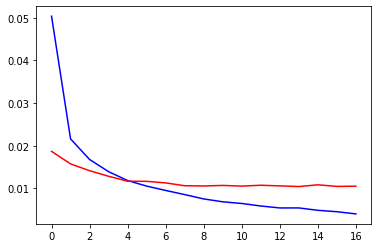

In [11]:
from matplotlib import pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

plt.plot(loss_values,'b',label='loss')
plt.plot(val_loss_values,'r',label='Validation loss')
plt.show()
